Evolutionary dynamics of organised crime and terrorist networks in an network explicit configuration
---

Louis Weyland

In [4]:
"""Importing all the modules."""
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

# Get directory first
path = os.getcwd()
par_dir = os.path.abspath(os.path.join(path, "../../"))
# Import own module
sys.path.append(par_dir)
if True:
    from network_utils.network_converter import NetworkConverter
    from network_utils.network_reader import NetworkReader
    from network_utils.network_stats import NetworkStats
    from simulators.meta_simulator import MetaSimulator
    from simulators.sim_mart_vaq import SimMartVaq
    from utils.plotter import Plotter

/home/louis/.local/share/virtualenvs/criminal_network_analysis-7tqkjw2s/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Set plotter
plotter = Plotter()
plotter.args.draw_network = "n"

In [6]:
# IFrame("https://www.nature.com/articles/s41598-019-46141-8.pdf", width=1200, height=500)

### Overview of the data

In [7]:
# IFrame("https://arxiv.org/pdf/2003.05303.pdf", width=1000, height=500)

In [8]:
# Get stats about network_obj
network_name = "montagna_calls"
nx_network = NetworkReader().get_data(network_name)
nk_network = NetworkConverter.nx_to_nk(nx_network)
network_stats = NetworkStats(nk_network)
network_stats.get_overview()

Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


{'component': 5,
 'is_powerlaw': False,
 'density': 0.026875699888017916,
 'secrecy': 37.208333333333336,
 'nodes': 95,
 'edges': 120,
 'avg_degree': 2.526315789473684,
 'clustering_coeff': 0.1167250622569182,
 'relative_density': 0.026875699888017916,
 'diameter': -1,
 'dispersion': 8.15,
 'avg_path_length': 3.3138267355134823}

In [9]:
# Plot the network
gt_network = NetworkConverter.nx_to_gt(nx_network)
plotter.draw_network(gt_network)

In [10]:
# Plot degree distribution
is_powerlaw = network_stats.check_if_powerlaw(network_stats.get_degree_distribution())
print(f"{is_powerlaw=}")
plotter.plot_log_log(
    network_stats.get_degree_distribution(), x_label="Degree", y_label="Count"
)

Calculating best minimal value for power law fit
is_powerlaw=(False, 2.6963785729521623)
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


<AxesSubplot:xlabel='Degree', ylabel='Count'>

### Building around the data by using preferential attachment

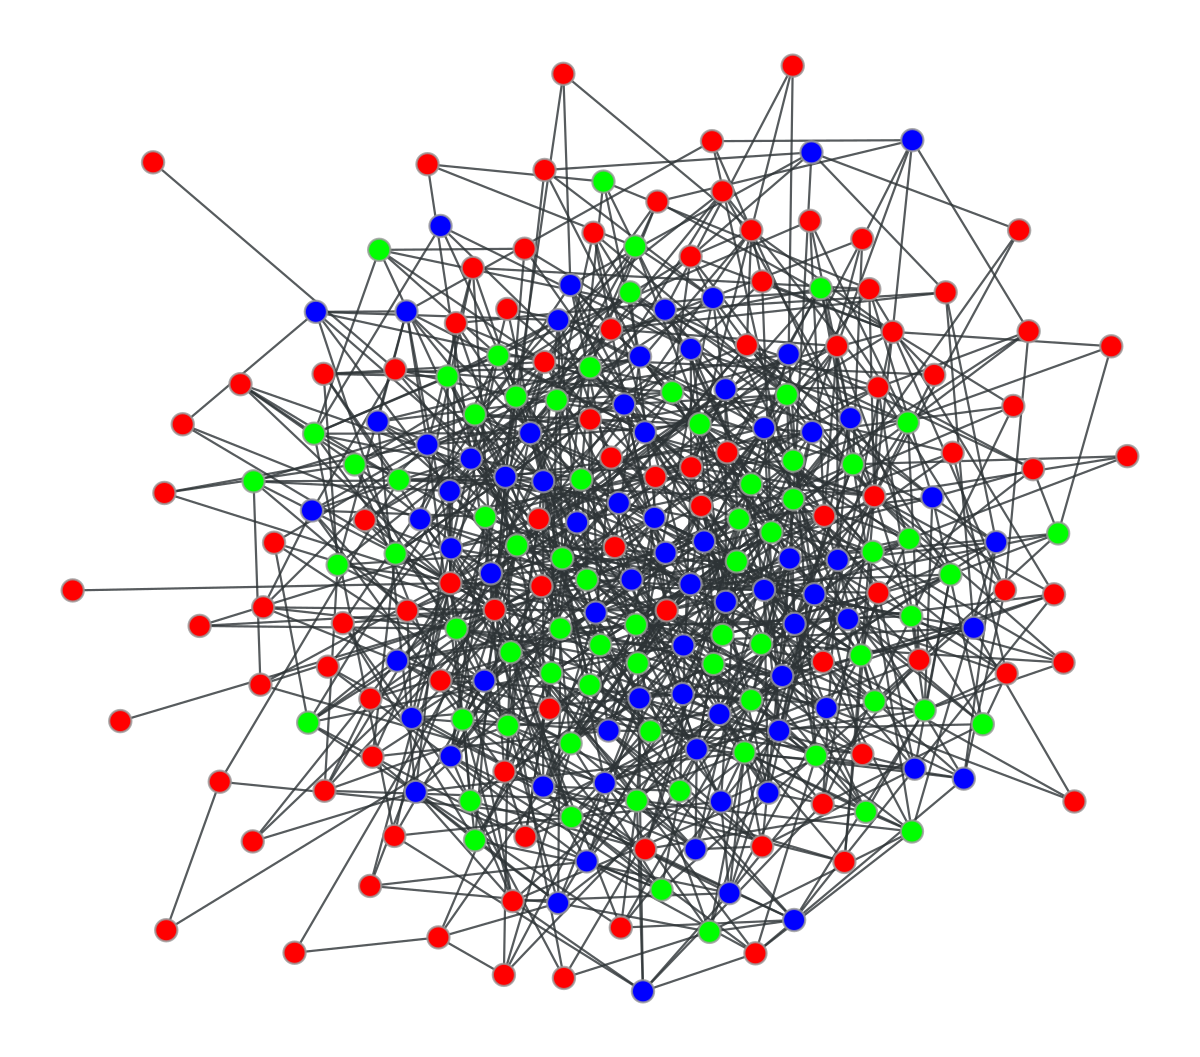

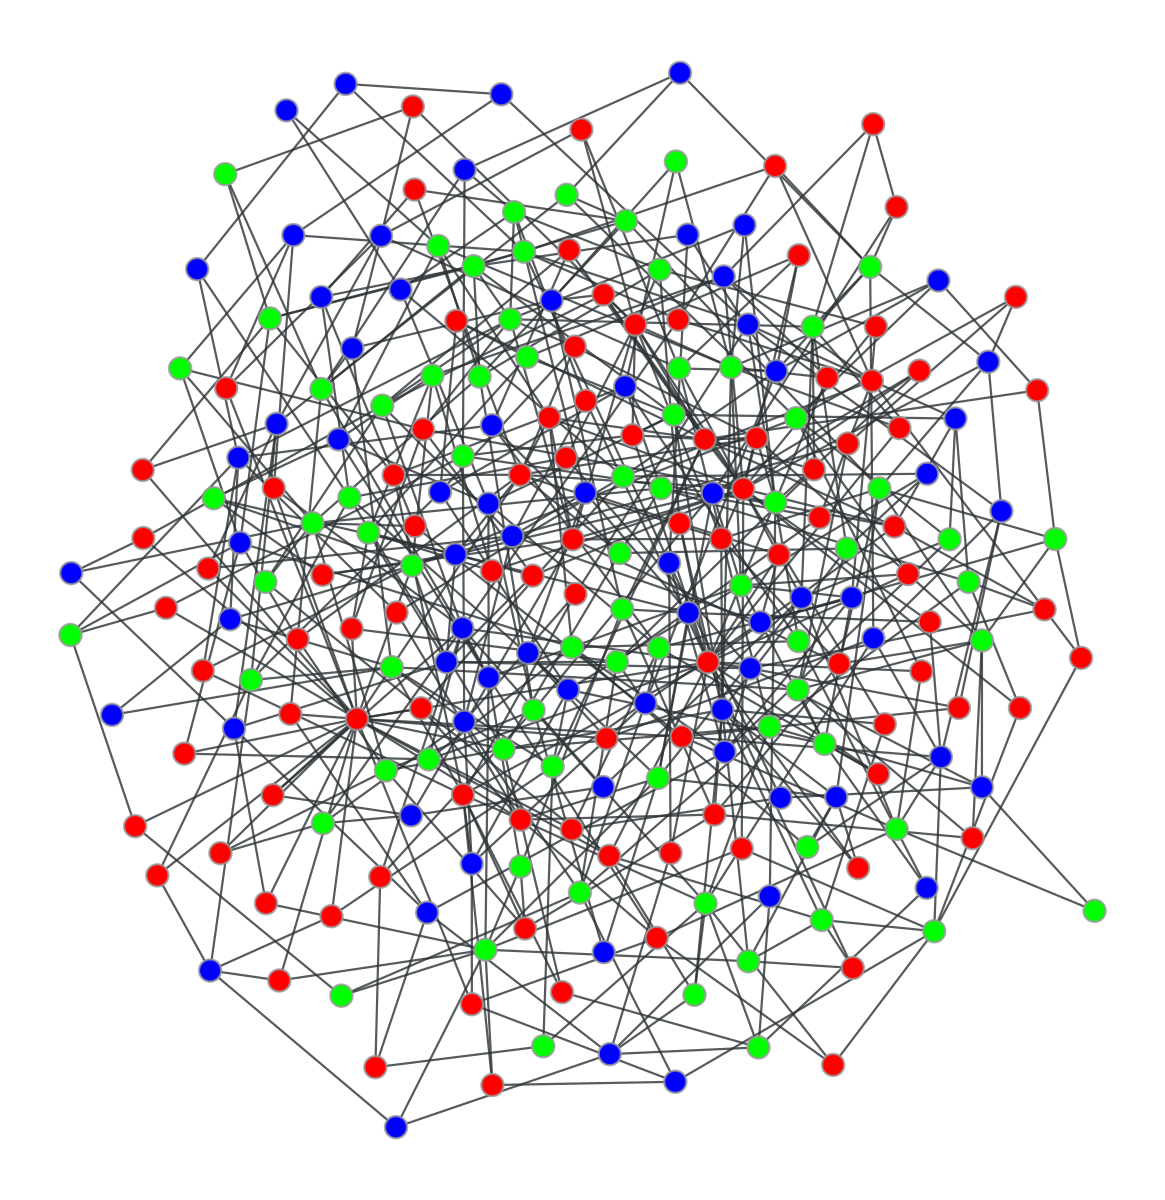

In [11]:
# Adding nodes based on preferential attachment
meta_sim_pref = MetaSimulator(
    network_name=network_name,
    ratio_honest=0.3,
    ratio_wolf=0.3,
    k=6,
    attachment_method="preferential",
)
meta_sim_rand = MetaSimulator(
    network_name=network_name,
    ratio_honest=0.3,
    ratio_wolf=0.3,
    k=6,
    attachment_method="random",
)
meta_sim_sw = MetaSimulator(
    network_name=network_name,
    ratio_honest=0.3,
    ratio_wolf=0.3,
    k=6,
    prob=0.6,
    attachment_method="small-world",
)

simulators_pref = SimMartVaq(network=meta_sim_pref.network)
simulators_rand = SimMartVaq(network=meta_sim_rand.network)
simulators_sw = SimMartVaq(network=meta_sim_sw.network)

plotter.draw_network(
    network=simulators_pref.network, color_vertex_property="status_color"
)
plotter.draw_network(
    network=simulators_rand.network, color_vertex_property="status_color"
)
plotter.draw_network(
    network=simulators_sw.network, color_vertex_property="status_color"
)

In [12]:
# Get overview of the new network
complete_network_stats_pref = NetworkStats(
    NetworkConverter.gt_to_nk(simulators_pref.network)
)
complete_network_stats_rand = NetworkStats(
    NetworkConverter.gt_to_nk(simulators_rand.network)
)
complete_network_stats_sw = NetworkStats(
    NetworkConverter.gt_to_nk(simulators_sw.network)
)

complete_network_stats_pref.get_overview()
complete_network_stats_rand.get_overview()
complete_network_stats_sw.get_overview()

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


{'component': 1,
 'is_powerlaw': False,
 'density': 0.04248015447328899,
 'secrecy': 23.54040404040404,
 'nodes': 237,
 'edges': 1188,
 'avg_degree': 10.025316455696203,
 'clustering_coeff': 0.044466792909334085,
 'relative_density': 0.04248015447328899,
 'diameter': 6,
 'dispersion': 13.107744107744109,
 'avg_path_length': 3.4843381248659084}

Calculating best minimal value for power law fit
is_powerlaw=(False, 3.737345712941741)
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


is_powerlaw=(False, 10.555846794712698)
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
is_powerlaw=(False, 6.579728533543219)
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


<AxesSubplot:xlabel='Degree', ylabel='Count'>

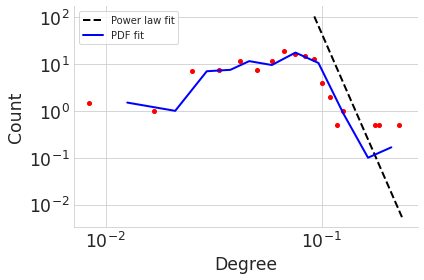

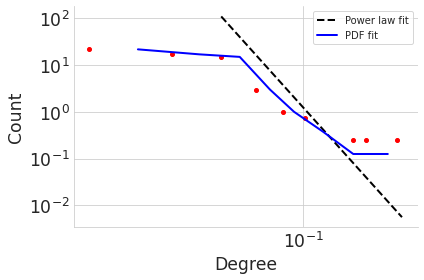

In [13]:
# Plot degree distribution
is_powerlaw = complete_network_stats_pref.check_if_powerlaw(
    complete_network_stats_pref.get_degree_distribution()
)
print(f"{is_powerlaw=}")
plotter.plot_log_log(
    complete_network_stats_pref.get_degree_distribution(),
    x_label="Degree",
    y_label="Count",
)

# Plot degree distribution
degree_dist_arr = np.array(complete_network_stats_rand.get_degree_distribution())
is_powerlaw = complete_network_stats_rand.check_if_powerlaw(
    degree_dist_arr[degree_dist_arr != 0]
)
print(f"{is_powerlaw=}")
plotter.plot_log_log(
    degree_dist_arr[degree_dist_arr != 0], x_label="Degree", y_label="Count"
)

# Plot degree distribution
is_powerlaw = complete_network_stats_sw.check_if_powerlaw(
    complete_network_stats_sw.get_degree_distribution()
)
print(f"{is_powerlaw=}")
plotter.plot_log_log(
    complete_network_stats_sw.get_degree_distribution(),
    x_label="Degree",
    y_label="Count",
)

### Dividing the network into groups

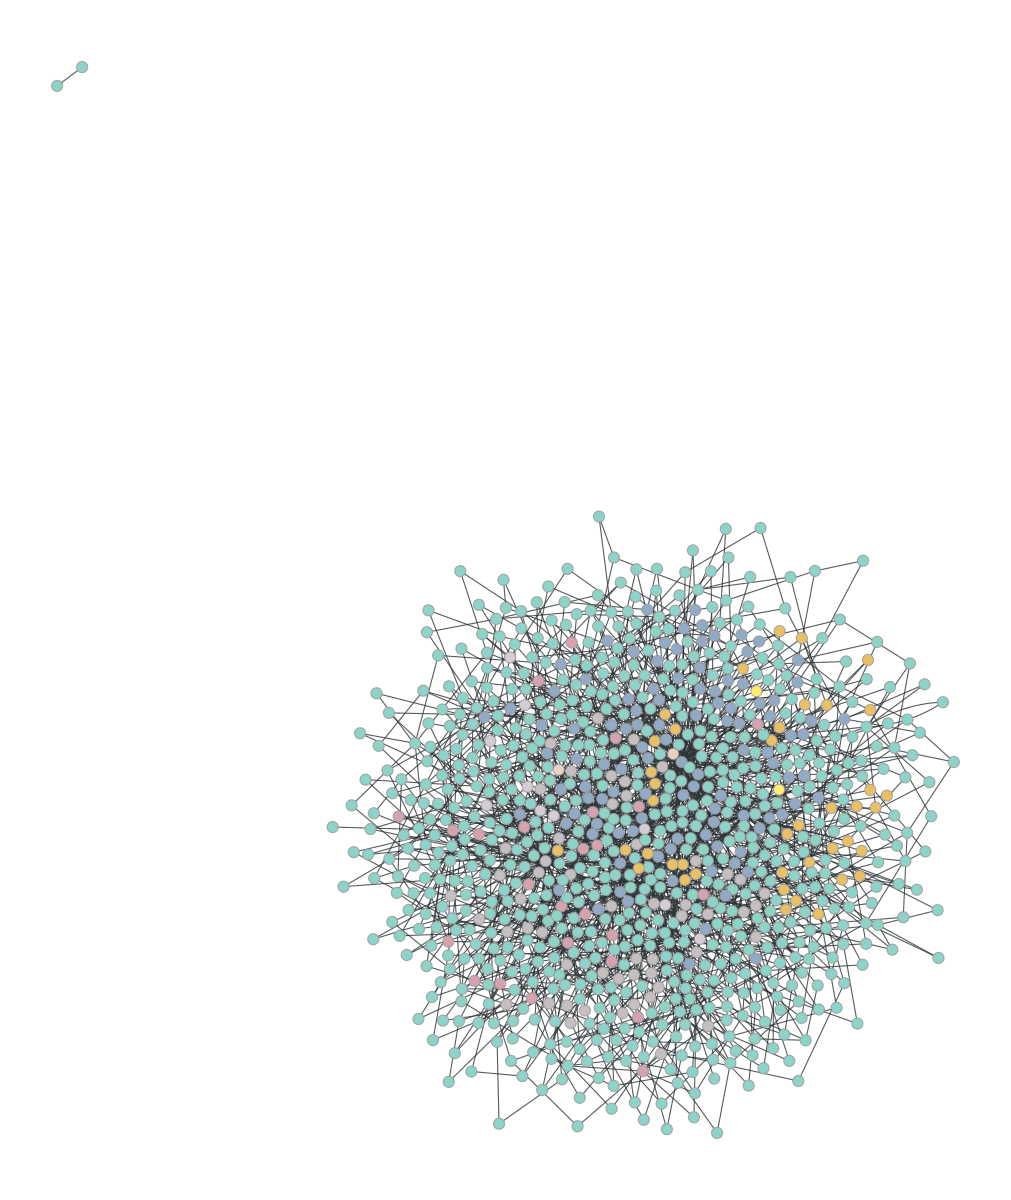

In [14]:
# Dividing network into groups
meta_sim = MetaSimulator(
    network_name=network_name,
    ratio_honest=0.8,
    ratio_wolf=0.1,
    k=2,
    random_fit_init=True,
    attachment_method="preferential",
)
simulators = SimMartVaq(network=meta_sim.network)

group_dict = simulators.select_multiple_communities(
    simulators.network, radius=2, min_grp=5, max_grp=6
)
color_code = simulators.network.new_vertex_property("int")
simulators.network.vertex_properties["group_color"] = color_code
for k, v in group_dict.items():
    for mbr in v:
        simulators.network.vp.group_color[simulators.network.vertex(mbr)] = k
plotter.draw_network(simulators.network, color_vertex_property="group_color")

### Run simulation

In [15]:
SimMartVaq.__init__?

Signature:
SimMartVaq.__init__(
    self,
    network: graph_tool.Graph,
    delta: float = 0.1,
    tau: float = 0.1,
    gamma: float = 0.1,
    beta_s: int = 1,
    beta_h: int = 1,
    beta_c: int = 1,
    c_w: int = 1,
    c_c: int = 1,
    r_w: int = 1,
    r_c: int = 1,
    r_h: int = 0,
    temperature: float = 10,
    mutation_prob: float = 0.0001,
    execute: str = 'parallel',
) -> None
Docstring:
Init the network characteristics.

Args:
    network (gt.Graph): Initial criminal network
    delta (int, optional): Influence of criminals on the acting of the wolf.
                           Defaults to 0.7.
    tau (int, optional):Influence of the wolf's action on criminals. Defaults to 0.8.
    gamma (float, optional): Punishment ratio for the other members of the criminal
                                                            organization. Defaults to 0.1.
    beta_s (int, optional): state punishment value. Defaults to 5.
    beta_h (int, optional): Civil punishment valu

In [30]:
# Run simulation 2
meta_sim = MetaSimulator(
    network_name=network_name,
    ratio_honest=0.9,
    ratio_wolf=0.01,
    k=20,
    random_fit_init=False,
    attachment_method="random",
)
simulators = SimMartVaq(
    network=meta_sim.network,
    delta=0.1,  # no acting for wolfs
    gamma=0.1,
    tau=0.7,  # no fintess sharing between wolf to criminal
    beta_s=10,
    beta_h=5,
    beta_c=25,
    c_c=1,  # no benefits from criminals/ they still act
    r_c=10,
    c_w=1,
    r_w=0.2,
    r_h=0,
    mutation_prob=0.01,  # only fermi function
)
data_collector = simulators.avg_play(
    network=simulators.network,
    rounds=20000,
    n_groups=1,
    repetition=5,
    ith_collect=20,
    collect_fitness=True,
)

Repeating simulation....: 100%|██████████| 5/5 [00:01<00:00,  3.93it/s]        


random mean_ratio_honest
[1.000e+00 2.000e+01 4.000e+01 ... 1.996e+04 1.998e+04 2.000e+04] [0.90151515 0.90094697 0.90208333 ... 0.81003788 0.80871212 0.80738636]
random mean_ratio_wolf
[1.000e+00 2.000e+01 4.000e+01 ... 1.996e+04 1.998e+04 2.000e+04] [0.00852273 0.00833333 0.00852273 ... 0.08314394 0.08314394 0.08314394]
random mean_ratio_criminal
[1.000e+00 2.000e+01 4.000e+01 ... 1.996e+04 1.998e+04 2.000e+04] [0.08996212 0.0907197  0.08939394 ... 0.10681818 0.10814394 0.1094697 ]


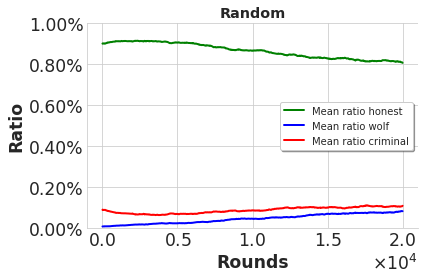

In [31]:
# Show the data
ax_0 = plotter.plot_lines(
    dict_data={"random": data_collector},
    y_data_to_plot=["mean_ratio_honest", "mean_ratio_wolf", "mean_ratio_criminal"],
    x_data_to_plot="mean_iteration",
    title="Testing the simulation",
    xlabel="rounds",
    ylabel="ratio",
    plot_std="True",
)

random mean_fitness_honest
[1.000e+00 2.000e+01 4.000e+01 ... 1.996e+04 1.998e+04 2.000e+04] [-0.00139916 -0.00947125 -0.0031316  ... -0.00904434 -0.01067934
 -0.00484596]
random mean_fitness_wolf
[1.000e+00 2.000e+01 4.000e+01 ... 1.996e+04 1.998e+04 2.000e+04] [ 0.         -0.00068813 -0.00022562 ... -0.01279287 -0.0051031
 -0.0035159 ]
random mean_fitness_criminal
[1.000e+00 2.000e+01 4.000e+01 ... 1.996e+04 1.998e+04 2.000e+04] [0.01402105 0.04814099 0.01913888 ... 0.0174446  0.01599335 0.0070614 ]


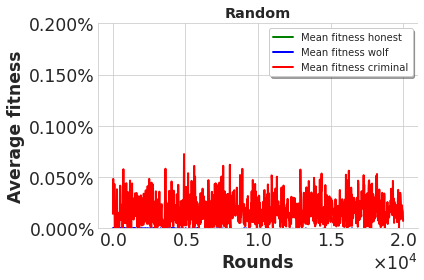

In [35]:
ax_1 = plotter.plot_lines(
    dict_data={"random": data_collector},
    y_data_to_plot=[
        "mean_fitness_honest",
        "mean_fitness_wolf",
        "mean_fitness_criminal",
    ],
    x_data_to_plot="mean_iteration",
    title="Testing the simulation",
    xlabel="rounds",
    ylabel="Average fitness",
    plot_std="True",
    ylim=[0, 0.2],
)
plt.show()